<a href="https://colab.research.google.com/github/guedhami/ProjetIA/blob/main/ProjetIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import requests
from scipy import stats

# Fetch the data
url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/heart-ksREcE0ZsykhzkJUnqfAksLIDDR3Bw.csv"
response = requests.get(url)
with open("/content/heart.csv", "wb") as f:
    f.write(response.content)

# Load the data
df = pd.read_csv("/content/heart.csv")

print(df.info())
print("\nSample data:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Sample data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    

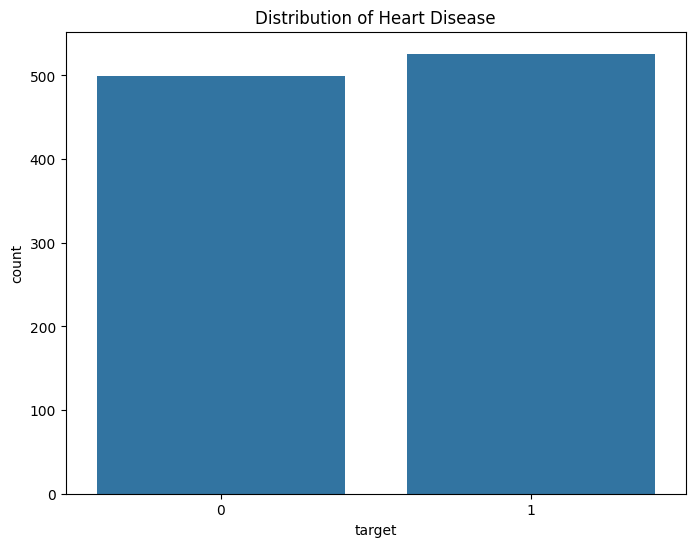

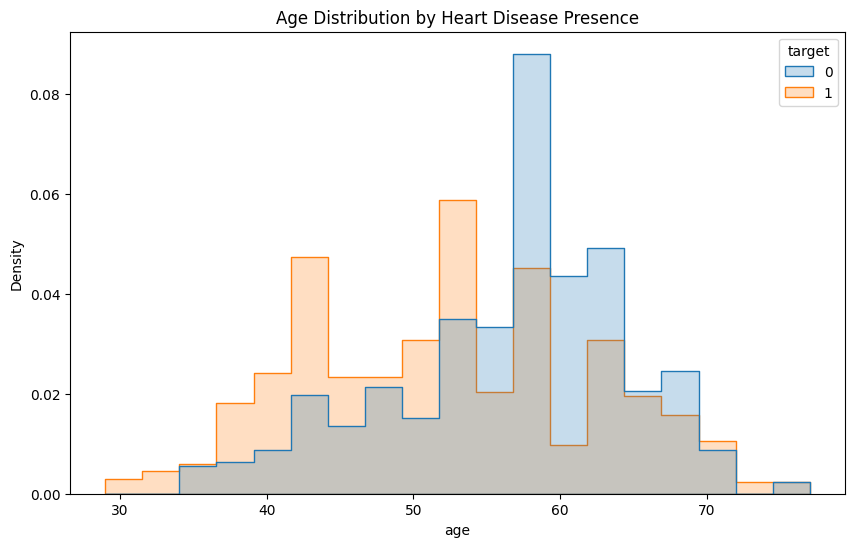

In [7]:
import joblib
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

# Age distribution by target
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Heart Disease Presence')
plt.show()

df['age_group'] = pd.cut(df['age'], bins=[0, 40, 50, 60, 100], labels=['<40', '40-50', '50-60', '>60'])
df['bp_category'] = pd.cut(df['trestbps'], bins=[0, 120, 140, 180, 300], labels=['Normal', 'Prehypertension', 'Stage 1', 'Stage 2'])
df['chol_category'] = pd.cut(df['chol'], bins=[0, 200, 240, 1000], labels=['Normal', 'Borderline', 'High'])


df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_group', 'bp_category', 'chol_category'])




Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       102
           1       0.80      0.87      0.84       103

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



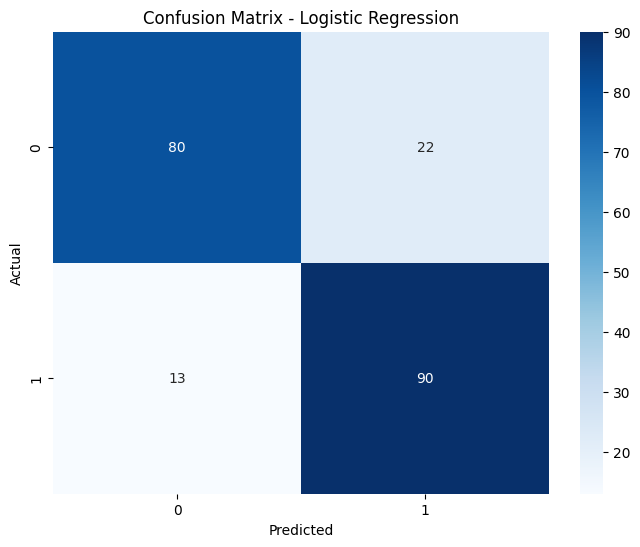

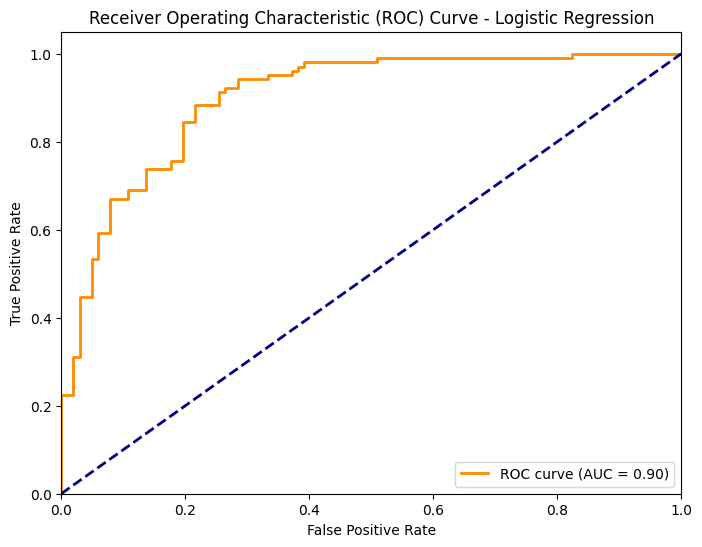


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



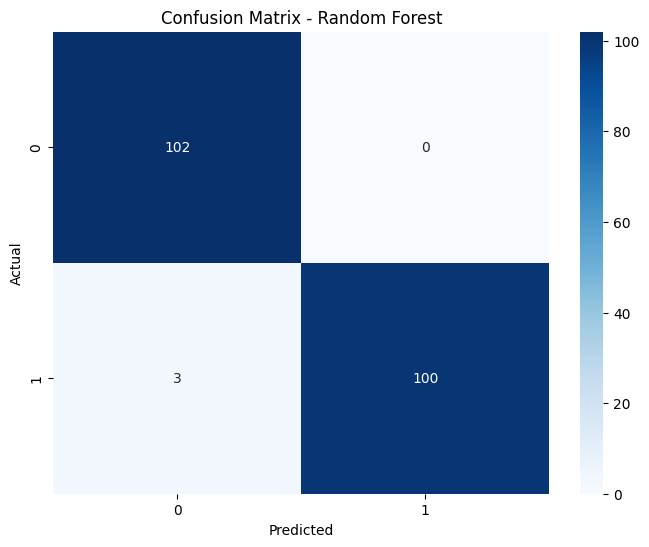

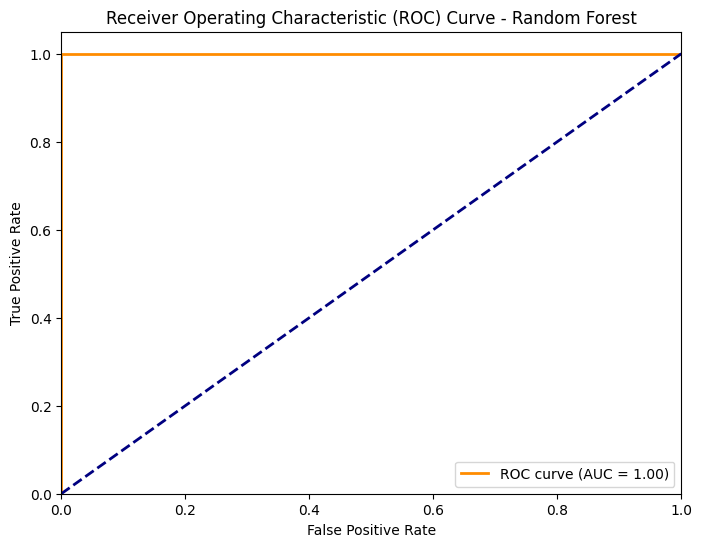


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       102
           1       0.90      0.92      0.91       103

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



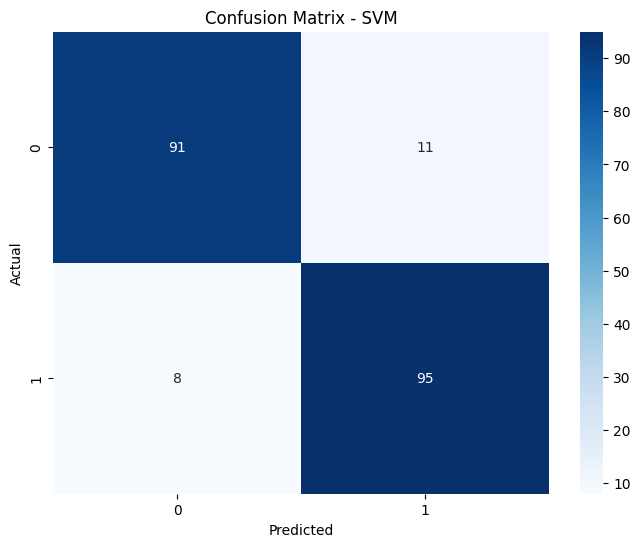

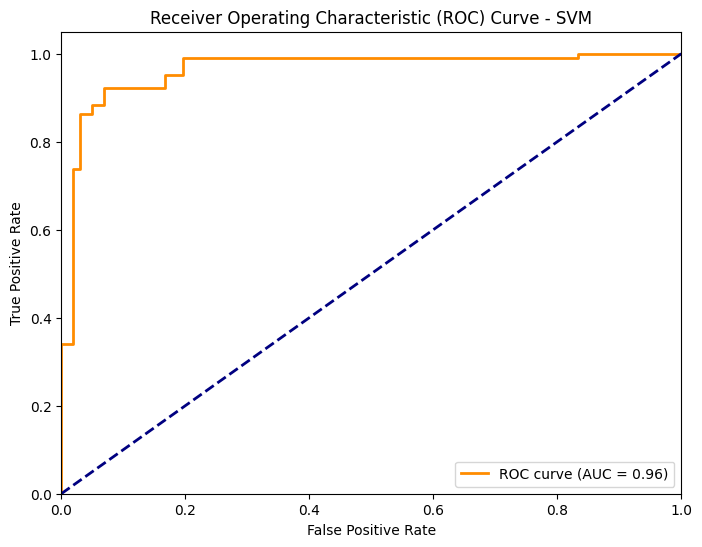

In [5]:

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Print classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Plot ROC curve
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()


Cluster distribution:
cluster
1    454
2    323
0    248
Name: count, dtype: int64


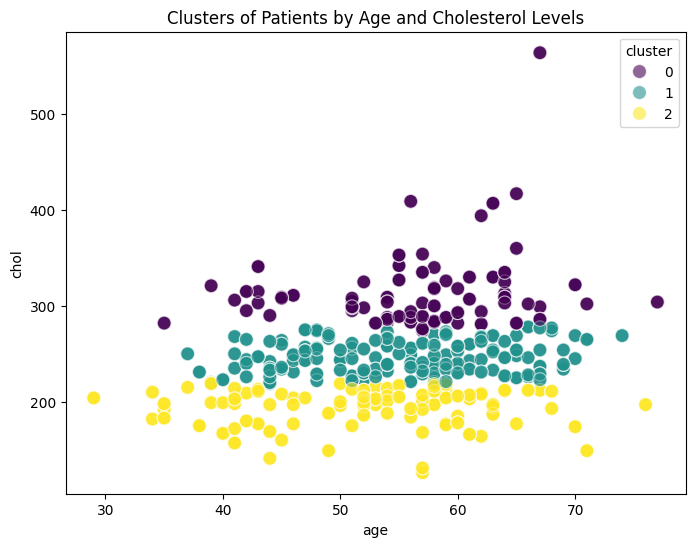

Silhouette Score for K-means clustering: 0.28


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the data
df_encoded['cluster'] = clusters

# Analyze cluster distribution
print("Cluster distribution:")
print(df_encoded['cluster'].value_counts())

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', hue='cluster', palette='viridis', data=df_encoded, s=100, alpha=0.6)
plt.title('Clusters of Patients by Age and Cholesterol Levels')
plt.show()
# Silhouette Score
sil_score = silhouette_score(X, clusters)
print(f'Silhouette Score for K-means clustering: {sil_score:.2f}')


Number of components selected: 24


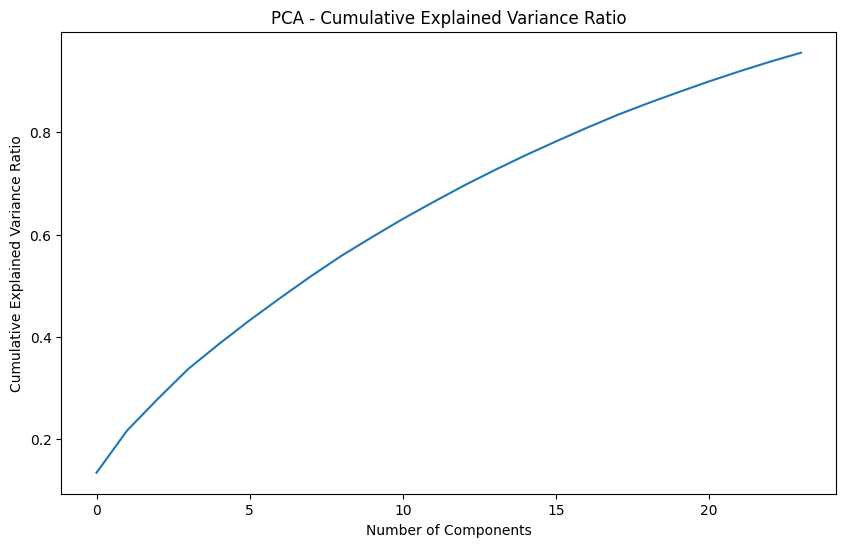

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.9878048780487804

Classification Report for Best Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



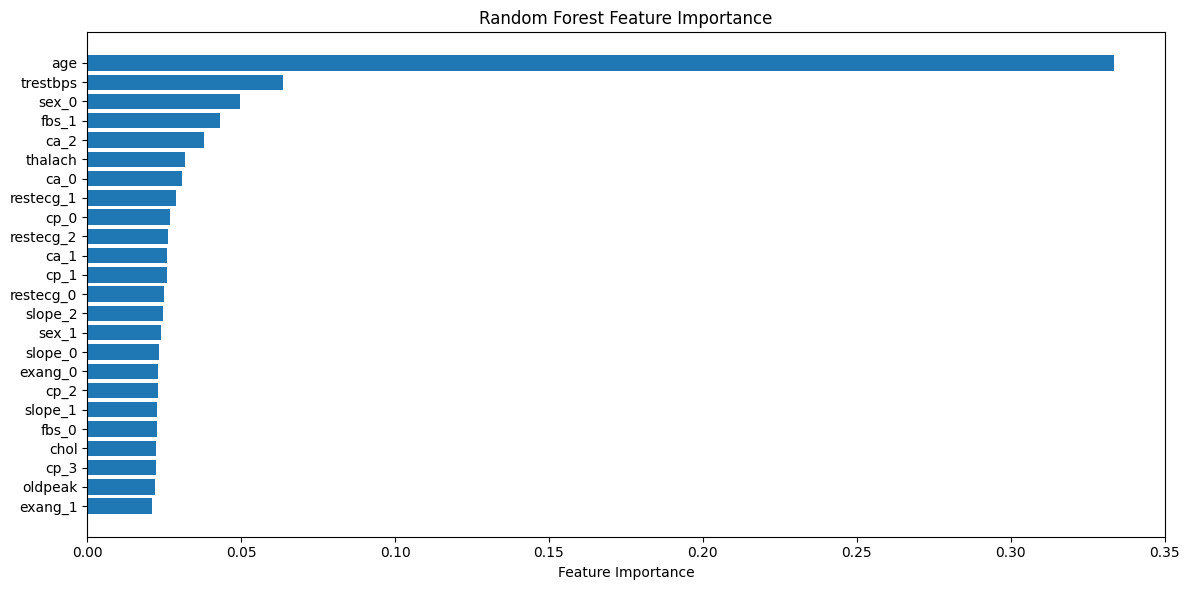

['scaler.pkl']

In [ ]:
# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of components selected: {pca.n_components_}")

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance Ratio')
plt.show()

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_pca)

print("\nClassification Report for Best Random Forest:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = best_rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

import joblib
joblib.dump(pca, 'pca.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(best_rf, 'best_rf_model.pkl')


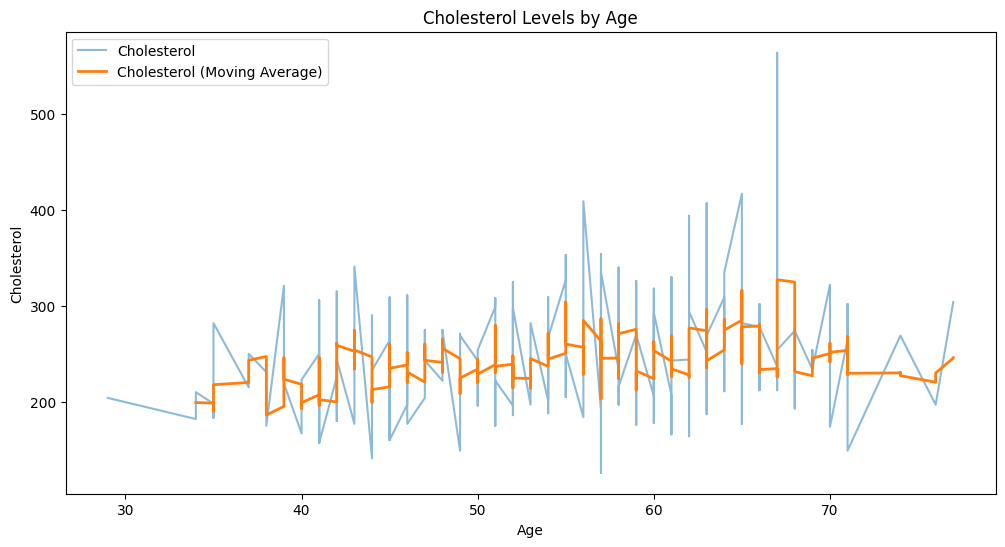

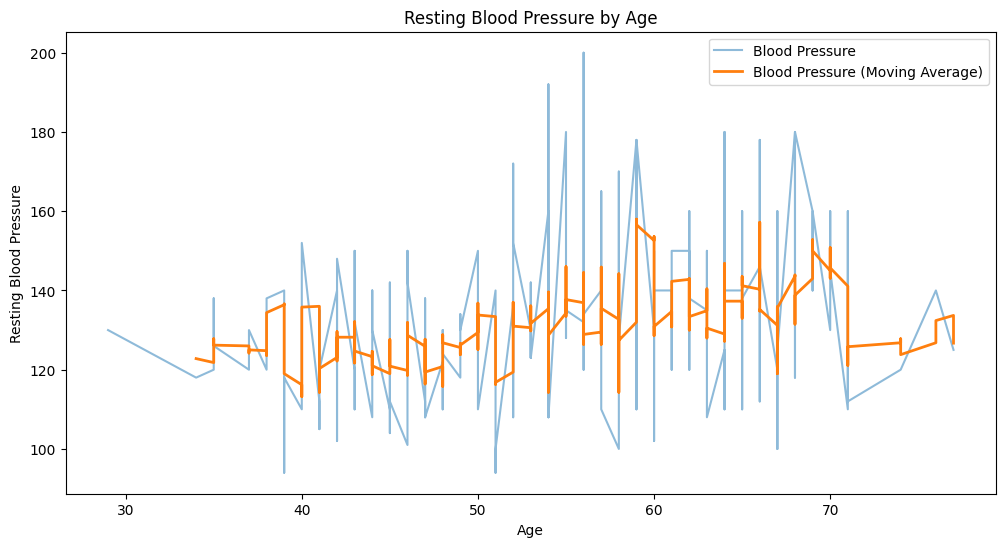

<Figure size 1200x600 with 0 Axes>

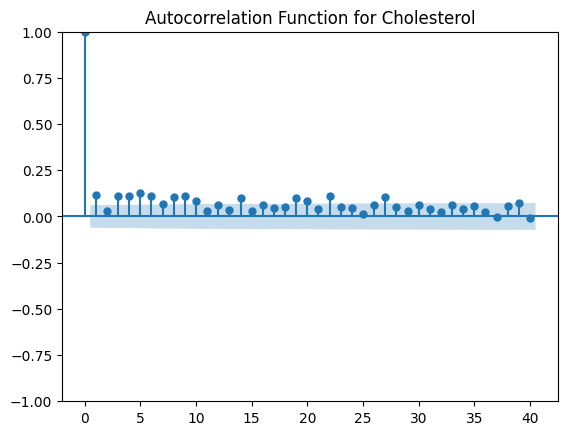

<Figure size 1200x600 with 0 Axes>

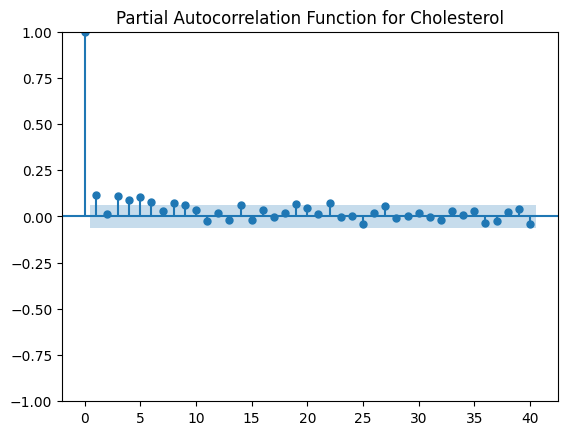

In [ ]:

df_sorted = df.sort_values('age')

# Calculate moving averages
df_sorted['chol_ma'] = df_sorted['chol'].rolling(window=10).mean()
df_sorted['trestbps_ma'] = df_sorted['trestbps'].rolling(window=10).mean()

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['age'], df_sorted['chol'], label='Cholesterol', alpha=0.5)
plt.plot(df_sorted['age'], df_sorted['chol_ma'], label='Cholesterol (Moving Average)', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Cholesterol Levels by Age')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['age'], df_sorted['trestbps'], label='Blood Pressure', alpha=0.5)
plt.plot(df_sorted['age'], df_sorted['trestbps_ma'], label='Blood Pressure (Moving Average)', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Resting Blood Pressure by Age')
plt.legend()
plt.show()

# Autocorrelation analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df_sorted['chol'].dropna(), lags=40)
plt.title('Autocorrelation Function for Cholesterol')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_sorted['chol'].dropna(), lags=40)
plt.title('Partial Autocorrelation Function for Cholesterol')
plt.show()


In [ ]:
# Example of using the model for prediction
new_data = "89 1 3 145 233 2 150 2.3 33 45 1 89 1 3 145 233 2 150 2.3 33 45 1 2 1"  # This is now a single string
new_data = [float(x) for x in new_data.split()] # Split the string and convert elements to floats
new_data = [new_data] # Convert the list into a 2D array
prediction = best_rf.predict(new_data)
print(f"\nPrediction for new data: {'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'}")


Prediction for new data: No Heart Disease
